In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = "../data/census/labor_force/"
df_21 = pd.read_csv(PATH + "labor_force_2021.csv")
df_16 = pd.read_csv(PATH + "labor_force_2016.csv")

In [3]:
# White
# Black or African American
# American Indian and Alaska Native
# Asian
# Native Hawaiian and Other Pacific Islander
# Some Other Race alone

def fix_labels(df):
    df["Label (Grouping)"] = df["Label (Grouping)"].map(lambda x: x.lstrip('\xa0'))

    
def get_topics_idcs(df):
    return df[df.isna().any(axis=1)].index


def get_topics(df):
    # Get IDCS of Grouping Rows
    idcs = get_topics_idcs(df)
    idx_pairs = [(idcs[i], idcs[i+1]) if i < (len(idcs) - 1) else (idcs[i],) for i in range(len(idcs))]
    
    # Format the labels
    fix_labels(df)
    
    labels = df.iloc[idcs]["Label (Grouping)"].values
    return list(zip(idx_pairs, labels))


def get_all_sub_dfs(df):
    
    all_subtopics = get_topics(df)
    topic = {}
    subtopics = []
    
    for subtopic_idcs, subtopic in all_subtopics:
        
        if len(subtopic_idcs) == 2:
            topic[subtopic] = df.iloc[subtopic_idcs[0] + 1:subtopic_idcs[1]]
        else:
            topic[subtopic] = df.iloc[subtopic_idcs[0] + 1:]
            
        # Check whether the first row contains values of interest
        if not df.iloc[0].isna().any():
            topic[subtopic].loc[-1] = df.loc[0]                # adding a row
            topic[subtopic].index = topic[subtopic].index + 1  # shifting index
            topic[subtopic] = topic[subtopic].sort_index()     # sorting by index

            
        topic[subtopic] = topic[subtopic].rename(columns={"Label (Grouping)": subtopic})
        topic[subtopic].set_index(subtopic, inplace=True)
        subtopics.append(subtopic)
            
    subtopics = '\n'.join([subtopic for subtopic in subtopics])
    print("The subtopics are:")
    print(subtopics)
    
    return topic


def convert_series_to_int(series):
    new_series = [int("".join(x.split(","))) if type(x) == str else x for x in series.values]
    return np.asarray(new_series)


In [4]:
fix_labels(df_21)
fix_labels(df_16)

dict_21 = get_all_sub_dfs(df_21)
dict_16 = get_all_sub_dfs(df_16)

The subtopics are:
EMPLOYMENT STATUS
COMMUTING TO WORK
OCCUPATION
INDUSTRY
CLASS OF WORKER
INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)
HEALTH INSURANCE COVERAGE
PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL
The subtopics are:
EMPLOYMENT STATUS
COMMUTING TO WORK
OCCUPATION
INDUSTRY
CLASS OF WORKER
INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)
HEALTH INSURANCE COVERAGE
PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL


In [6]:
df_21 = dict_21["EMPLOYMENT STATUS"]
df_16 = dict_16["EMPLOYMENT STATUS"]

In [14]:
df_21.drop(index="Unemployment Rate", inplace=True)
df_16.drop(index="Unemployment Rate", inplace=True)

In [15]:
curr_list = [df_21, df_16]

for idx in range(len(curr_list)):
    
    # Preprocess data
    all_columns = []
    for column in curr_list[idx].iloc[:-1].columns:
        if "Percent" in column:
            all_columns.append(column)

    curr_list[idx].drop(columns=all_columns, inplace=True)
    curr_list[idx] = curr_list[idx].apply(convert_series_to_int)

    curr_list[idx].columns = [x[1].split(", District")[0][1:] + " - " + x[-1].split("!!")[1] for x in curr_list[idx].columns.str.split("Census")]
    curr_list[idx] = curr_list[idx].iloc[:]

In [16]:
# What would be good to look at?

# 1. Percentage of Tract that is below poverty level
# 2. Percentage of which race makes up which portion of Below poverty level
# 3. Percentage of how many of a race are below poverty level

curr_list[0]

,Tract 64 - Estimate,Tract 102.01 - Estimate,Tract 102.02 - Estimate,Tract 105 - Estimate,Tract 110.01 - Estimate,Tract 110.02 - Estimate
EMPLOYMENT STATUS,,,,,,
Population 16 years and over,2003,2311,1747,3700,2320,1479
In labor force,1158,1974,1360,3020,1952,1108
Civilian labor force,1135,1974,1360,3020,1877,1070
Employed,983,1884,1339,2913,1868,991
Unemployed,152,90,21,107,9,79
Armed Forces,23,0,0,0,75,38
Not in labor force,845,337,387,680,368,371
Civilian labor force,1135,1974,1360,3020,1877,1070
Females 16 years and over,1075,1009,961,1901,1251,822


In [43]:
tracts = ["Tract 64", "Tract 102.01", "Tract 102.02", "Tract 105", "Tract 110.01", "Tract 110.02"]
tract_df = curr_list[-1].loc[:, curr_list[-1].columns.str.contains(tracts[0])]
tract_df

,Tract 64 - Estimate
EMPLOYMENT STATUS,
Population 16 years and over,1944
In labor force,993
Civilian labor force,975
Employed,823
Unemployed,152
Armed Forces,18
Not in labor force,951
Civilian labor force,975
Females 16 years and over,1182


In [67]:
# Get appropriate columns for the data frame
# ------------------------------------------

# ONLY EXECUTE THIS WHEN THE VARIABLE IS ABOUT RACE
labels = np.asarray([x.split(" alone")[0] for x in list(curr_list[0].index)])
new_columns = labels[1:]
new_columns[-1] = "Mixed race"

In [25]:
tract_df

,Tract 64 - Estimate
Median contract rent,408


In [69]:

# Get data
# --------
tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]
years = ["2021", "2016"]


tract_dict = {}
for tract in tracts:

    year_dict = {}
    
    for idx, year in enumerate(years):
        
        try:

            tract_df = curr_list[idx].loc[:, curr_list[idx].columns.str.contains(tract)]
            values = tract_df.iloc[[3, 4, 6]].values[:, 0]

            # poverty_by_tract[tract] = all_values
            year_dict[year] = values
            
        except IndexError:
            continue
            
    # reverse the dictionary to stay in chronological order
    tract_dict[tract] = dict(reversed(list(year_dict.items())))
    

In [70]:
tract_dict["Tract 64"]

{'2016': array([823, 152, 951]), '2021': array([983, 152, 845])}

In [75]:
pd.DataFrame.from_dict(tract_dict["Tract 64"], orient="index", columns=["Employed (in labor force)", "Unemployed (in labor force)", "Not in labor force"])

,Employed (in labor force),Unemployed (in labor force),Not in labor force
2016,823,152,951
2021,983,152,845


In [73]:
tract_dict

{'Tract 64': {'2016': array([823, 152, 951]), '2021': array([983, 152, 845])},
 'Tract 105': {'2016': array([2279,  217,  707]),
  '2021': array([2913,  107,  680])},
 'Tract 102.01': {'2021': array([1884,   90,  337])},
 'Tract 102.02': {'2021': array([1339,   21,  387])},
 'Tract 110.01': {'2021': array([1868,    9,  368])},
 'Tract 110.02': {'2021': array([991,  79, 371])}}

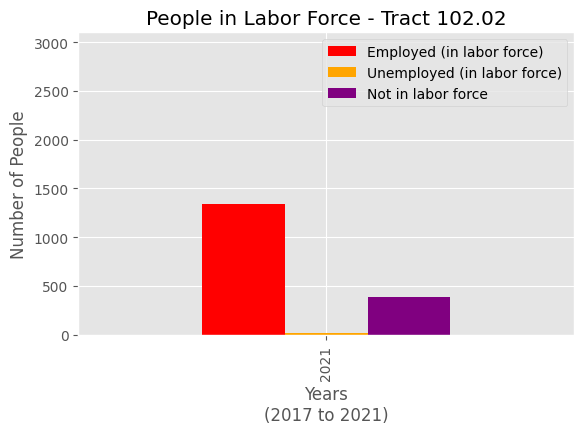

In [85]:
import matplotlib
matplotlib.style.use('ggplot')

tract = "Tract 102.02"
pd.DataFrame.from_dict(tract_dict[tract]).T.plot(color=["red", "orange", "purple"], kind="bar")
plt.gcf().subplots_adjust(bottom=0.25)
plt.title(f"People in Labor Force - {tract}")
plt.xlabel("Years\n(2017 to 2021)")
plt.ylabel("Number of People")
plt.ylim((0, 3100))
plt.legend(["Employed (in labor force)", "Unemployed (in labor force)", "Not in labor force"], loc="best")
plt.savefig(f"../plots/labor_force/{tract}.png")
